In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Electricity.csv')

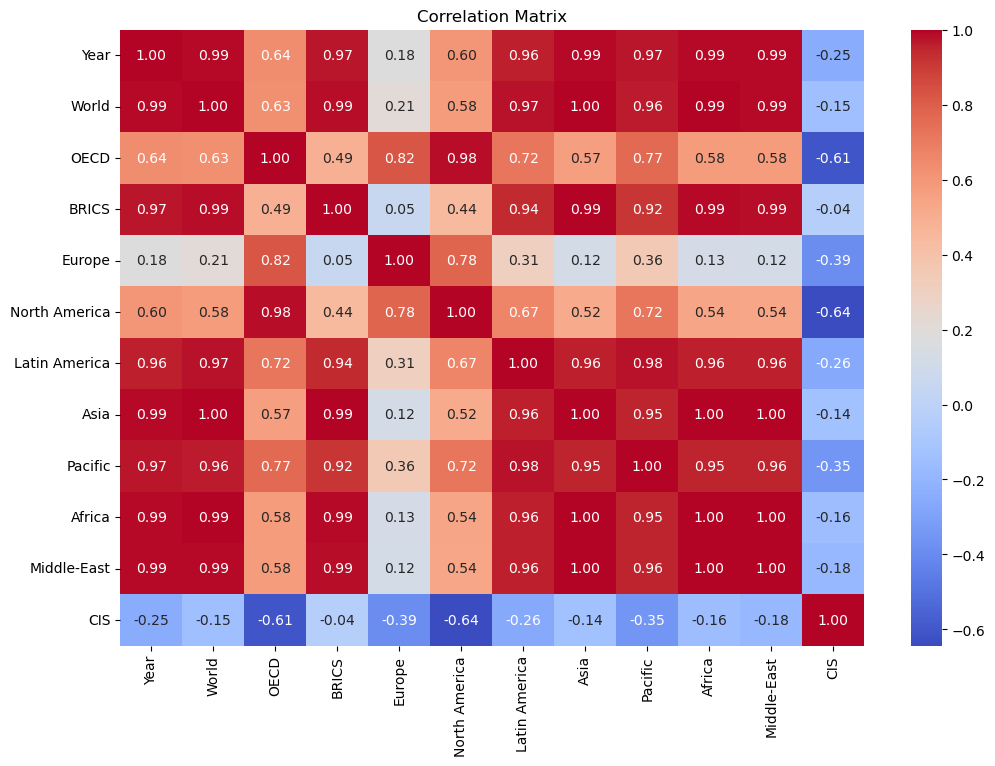

In [3]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [4]:
target = 'World'
features = df.columns[df.columns != target]

In [5]:
X = df[features] 
y = df[target] 

In [6]:
df_filled = df.fillna(df.mean()) 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 15589.65411632343
R-Squared: 0.9999641959084117


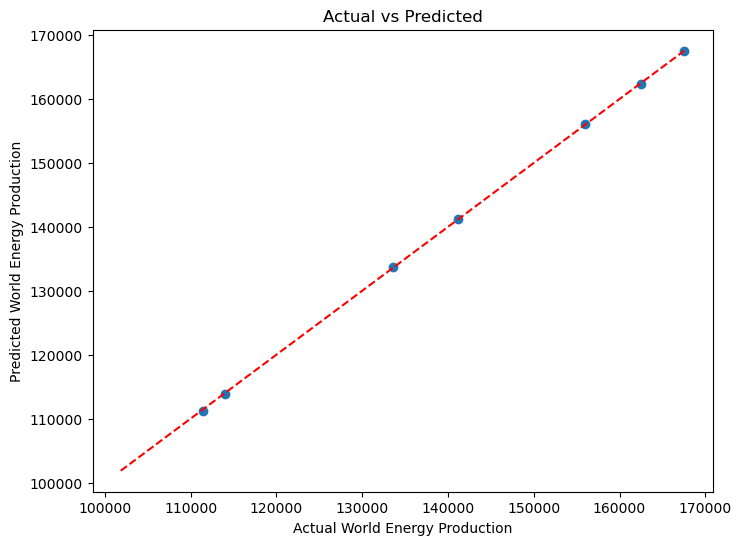

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual World Energy Production')
plt.ylabel('Predicted World Energy Production')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.show()

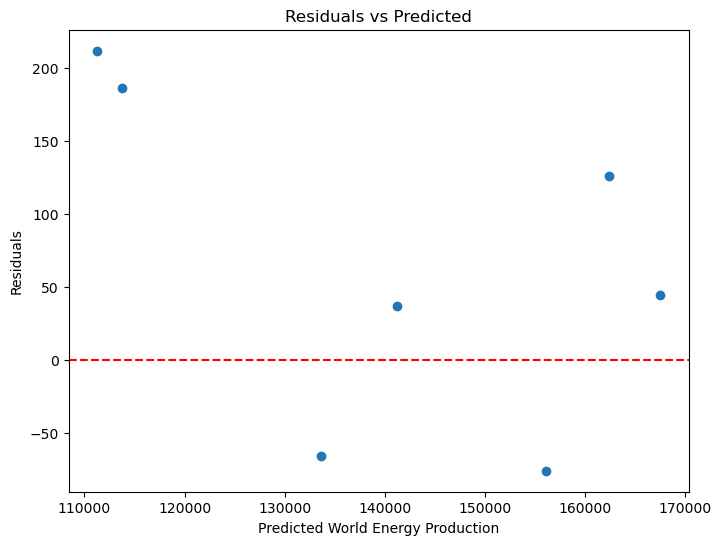

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted World Energy Production')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

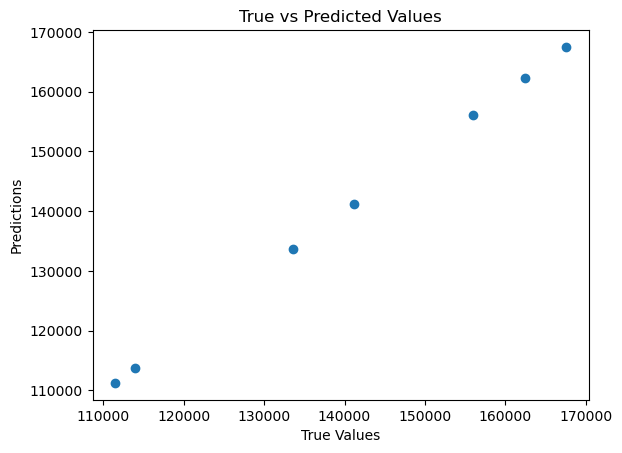

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


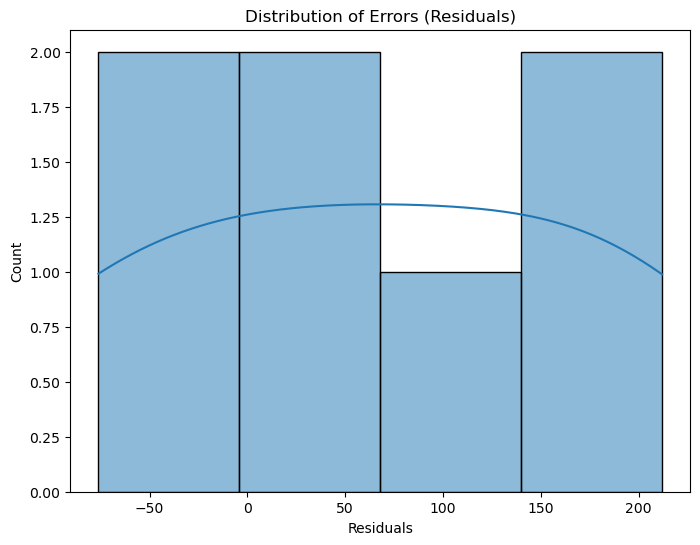

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Errors (Residuals)')
plt.show()